# =========================
# Load libraries
# =========================

In [1]:
import pandas as pd
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras import callbacks, layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Using TensorFlow backend.
/home/tcake/coding_projects/python/opt_out/study-online-misogyny/venv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/tcake/coding_projects/python/opt_out/study-online-misogyny/venv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/tcake/coding_projects/python/opt_out/study-online-misogyny/venv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be underst

# =========================
# Load data
# =========================

In [2]:
# Load stanford data
data = pd.read_csv("../../data/processed/stanford.csv")

train_data, test_data, train_labels, test_labels = train_test_split(
    data["text"], data["label"], test_size=0.2
)

# =========================
# Callbacks
# =========================

In [3]:
callbacks = [ callbacks.TensorBoard(
    log_dir='log_fully_connected_one_hot',
    histogram_freq=1,
    )
]

# =========================
# One-hot encode
# =========================

In [4]:
# Create unique index for every word and fit to training data
tokenizer = Tokenizer(num_words = 10000)
tokenizer.fit_on_texts(train_data)

# Print the number of unique words found in the data set (not the limit placed
# on the tokenizer), use this as feedback to the num_words arg of Tokenizer().
print('Found %d unique words.' % len(tokenizer.word_index))

# One-hot encode
train_encodings = tokenizer.texts_to_matrix(train_data, mode = 'binary')

Found 54016 unique words.


# =========================
# Split data
# =========================

In [5]:
# Randomly shuffle data
indices = np.arange(train_encodings.shape[0])
np.random.shuffle(indices)
train_encodings = train_encodings[indices]
train_labels = train_labels.values[indices]

# Split into training and validation data (approximately 80:20)
x_train = train_encodings[:24000]
y_train = train_labels[:24000]
x_val   = train_encodings[24000:]
y_val   = train_labels[24000:]

# =========================
# Build model
# =========================

In [6]:
# Note the input_shape of the first layer will match the num_words arg from
# the Tokenizer() function. Double check with len(data[0])
# The final sigmoid layer outputs probability values between [0, 1]
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

# =========================
# Train model
# =========================



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 24000 samples, validate on 811 samples



Epoch 1/20
24000/24000 [==============================] - 5s 190us/step - loss: 0.5638 - acc: 0.7445 - val_loss: 0.4660 - val_acc: 0.7818
Epoch 2/20
24000/24000 [==============================] - 3s 119us/step - loss: 0.4068 - acc: 0.8125 - val_loss: 0.3952 - val_acc: 0.7928
Epoch 3/20
24000/24000 [==============================] - 3s 122us/step - loss: 0.3330 - acc: 0.8436 - val_loss: 0.3723 - val_acc: 0.8027
Epoch 4/20
24000/24000 [==============================] - 3s 128us/step - loss: 0.2899 - acc: 0.8656 - val_loss: 0.3712 - val_acc: 0.8027
Epoch 5/20
24000/24000 [==============================] - 3s 127us/step - loss: 0.2625 - acc: 0.8810 - val_loss: 0.3795 - val_acc: 0.7990
Epoch 6/20
24000/24000 [==============================] - 3s 119us/step - loss: 0.2419 - acc: 0.8920 - val_loss: 0.3921 - val_acc: 0.7965
Epoch 7/20
24000/24000 [

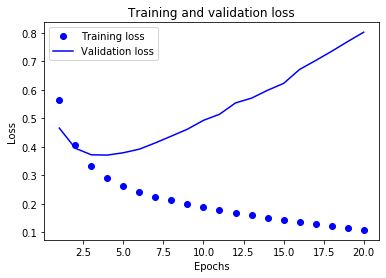

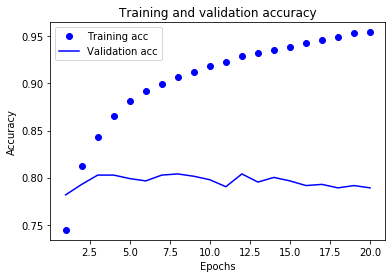

In [7]:
# As the model outputs probabilities, binary crossentropy is the best loss
# metric as it measures the distance between probability distributions
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

history = model.fit(x_train,
                    y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val), 
                    callbacks=callbacks)

# Prep history dictionary
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plot the training and validation loss
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.clf()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# =========================
# Evaluate on test data
# =========================

In [9]:
# DO NOT retrain to tokenizer. Use the argument oov_token=True to reserve a
# token for unkown words. See https://bit.ly/2lNh15g

# One-hot encode
test_encodings = tokenizer.texts_to_matrix(test_data, mode = 'binary')

# Print results as ['loss', 'acc'] check names with model.metrics_names
model.evaluate(test_encodings, test_labels.values)

model.metrics_names





6203/6203 [==============================] - 1s 192us/step


['loss', 'acc']